In [22]:
import pandas as pd
import numpy as np
import scipy.optimize as opt
from sklearn import preprocessing
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split, cross_val_score


In [23]:
df = pd.read_csv("dataset/framingham.csv")
df.info()
df.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4240 entries, 0 to 4239
Data columns (total 16 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   male             4240 non-null   int64  
 1   age              4240 non-null   int64  
 2   education        4135 non-null   float64
 3   currentSmoker    4240 non-null   int64  
 4   cigsPerDay       4211 non-null   float64
 5   BPMeds           4187 non-null   float64
 6   prevalentStroke  4240 non-null   int64  
 7   prevalentHyp     4240 non-null   int64  
 8   diabetes         4240 non-null   int64  
 9   totChol          4190 non-null   float64
 10  sysBP            4240 non-null   float64
 11  diaBP            4240 non-null   float64
 12  BMI              4221 non-null   float64
 13  heartRate        4239 non-null   float64
 14  glucose          3852 non-null   float64
 15  TenYearCHD       4240 non-null   int64  
dtypes: float64(9), int64(7)
memory usage: 530.1 KB


,male,age,education,currentSmoker,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,sysBP,diaBP,BMI,heartRate,glucose,TenYearCHD
count,4240.000000,4240.000000,4135.000000,4240.000000,4211.000000,4187.000000,4240.000000,4240.000000,4240.000000,4190.000000,4240.000000,4240.000000,4221.000000,4239.000000,3852.000000,4240.000000
mean,0.429245,49.580189,1.979444,0.494104,9.005937,0.029615,0.005896,0.310613,0.025708,236.699523,132.354599,82.897759,25.800801,75.878981,81.963655,0.151887
std,0.495027,8.572942,1.019791,0.500024,11.922462,0.169544,0.076569,0.462799,0.158280,44.591284,22.033300,11.910394,4.079840,12.025348,23.954335,0.358953
min,0.000000,32.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,107.000000,83.500000,48.000000,15.540000,44.000000,40.000000,0.000000
25%,0.000000,42.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,206.000000,117.000000,75.000000,23.070000,68.000000,71.000000,0.000000
50%,0.000000,49.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,234.000000,128.000000,82.000000,25.400000,75.000000,78.000000,0.000000
75%,1.000000,56.000000,3.000000,1.000000,20.000000,0.000000,0.000000,1.000000,0.000000,263.000000,144.000000,90.000000,28.040000,83.000000,87.000000,0.000000
max,1.000000,70.000000,4.000000,1.000000,70.000000,1.000000,1.000000,1.000000,1.000000,696.000000,295.000000,142.500000,56.800000,143.000000,394.000000,1.000000


In [24]:
df.fillna(df.mean(), inplace=True)

In [25]:
df.info()
df.describe()
df

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4240 entries, 0 to 4239
Data columns (total 16 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   male             4240 non-null   int64  
 1   age              4240 non-null   int64  
 2   education        4240 non-null   float64
 3   currentSmoker    4240 non-null   int64  
 4   cigsPerDay       4240 non-null   float64
 5   BPMeds           4240 non-null   float64
 6   prevalentStroke  4240 non-null   int64  
 7   prevalentHyp     4240 non-null   int64  
 8   diabetes         4240 non-null   int64  
 9   totChol          4240 non-null   float64
 10  sysBP            4240 non-null   float64
 11  diaBP            4240 non-null   float64
 12  BMI              4240 non-null   float64
 13  heartRate        4240 non-null   float64
 14  glucose          4240 non-null   float64
 15  TenYearCHD       4240 non-null   int64  
dtypes: float64(9), int64(7)
memory usage: 530.1 KB


,male,age,education,currentSmoker,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,sysBP,diaBP,BMI,heartRate,glucose,TenYearCHD
0,1,39,4.0,0,0.0,0.000000,0,0,0,195.0,106.0,70.0,26.97,80.0,77.000000,0
1,0,46,2.0,0,0.0,0.000000,0,0,0,250.0,121.0,81.0,28.73,95.0,76.000000,0
2,1,48,1.0,1,20.0,0.000000,0,0,0,245.0,127.5,80.0,25.34,75.0,70.000000,0
3,0,61,3.0,1,30.0,0.000000,0,1,0,225.0,150.0,95.0,28.58,65.0,103.000000,1
4,0,46,3.0,1,23.0,0.000000,0,0,0,285.0,130.0,84.0,23.10,85.0,85.000000,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4235,0,48,2.0,1,20.0,0.029615,0,0,0,248.0,131.0,72.0,22.00,84.0,86.000000,0
4236,0,44,1.0,1,15.0,0.000000,0,0,0,210.0,126.5,87.0,19.16,86.0,81.963655,0
4237,0,52,2.0,0,0.0,0.000000,0,0,0,269.0,133.5,83.0,21.47,80.0,107.000000,0
4238,1,40,3.0,0,0.0,0.000000,0,1,0,185.0,141.0,98.0,25.60,67.0,72.000000,0


In [26]:
print(df.TenYearCHD.value_counts())

TenYearCHD
0    3596
1     644
Name: count, dtype: int64


In [27]:
X = df.iloc[:, : -1]
X
y = df.iloc[:, -1]
y

0       0
1       0
2       0
3       1
4       0
       ..
4235    0
4236    0
4237    0
4238    0
4239    0
Name: TenYearCHD, Length: 4240, dtype: int64

In [28]:
X = preprocessing.StandardScaler().fit(X).transform(X)
X

array([[ 1.15311332, -1.23428297,  2.00658417, ...,  0.28725796,
         0.34277523, -0.21742709],
       [-0.86721746, -0.41766419,  0.02041408, ...,  0.71966845,
         1.59043467, -0.26123092],
       [ 1.15311332, -0.18434454, -0.97267096, ..., -0.11321311,
        -0.07311125, -0.52405388],
       ...,
       [-0.86721746,  0.28229477,  0.02041408, ..., -1.06402482,
         0.34277523,  1.09668771],
       [ 1.15311332, -1.11762315,  1.01349912, ..., -0.04933429,
        -0.73852962, -0.43644623],
       [-0.86721746, -1.23428297,  1.01349912, ..., -1.20160997,
         0.75866171, -0.08601561]], shape=(4240, 15))

In [29]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=4)
print("Train set: ", X_train.shape, y_train.shape)
print("Test set: ", X_test.shape, y_test.shape)

Train set:  (3392, 15) (3392,)
Test set:  (848, 15) (848,)


/tmp/ipykernel_40005/1804690168.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='TenYearCHD', data=df,


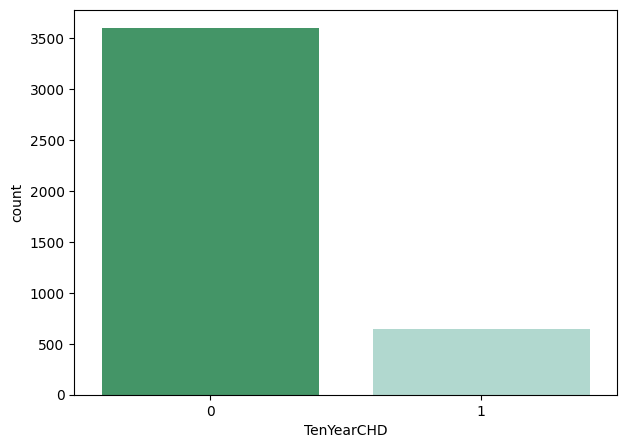

In [30]:
plt.figure(figsize=(7, 5))
sns.countplot(x='TenYearCHD', data=df,
             palette="BuGn_r")
plt.show()

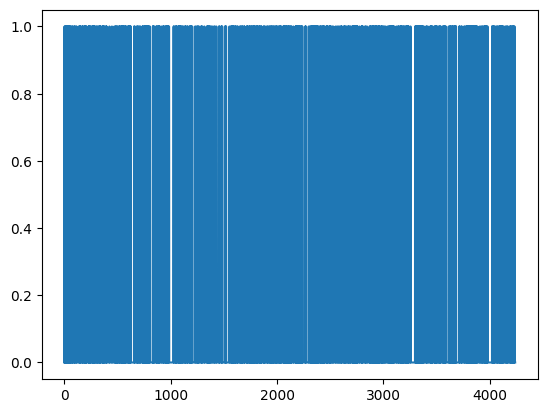

In [31]:
laste = df['TenYearCHD'].plot()
plt.show(laste)

In [32]:
model = LogisticRegression()
model.fit(X_train, y_train)
y_pred = model.predict(X_test)

In [33]:
print('Accuracy of the model is =', 
      accuracy_score(y_test, y_pred))

Accuracy of the model is = 0.8525943396226415


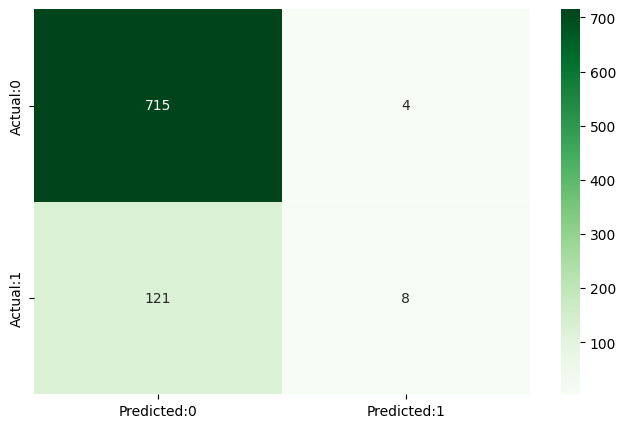

The details for confusion matrix is =
              precision    recall  f1-score   support

           0       0.86      0.99      0.92       719
           1       0.67      0.06      0.11       129

    accuracy                           0.85       848
   macro avg       0.76      0.53      0.52       848
weighted avg       0.83      0.85      0.80       848



In [34]:
cm = confusion_matrix(y_test, y_pred)
conf_matrix = pd.DataFrame(data = cm, 
                           columns = ['Predicted:0', 'Predicted:1'], 
                           index =['Actual:0', 'Actual:1'])

plt.figure(figsize = (8, 5))
sns.heatmap(conf_matrix, annot = True, fmt = 'd', cmap = "Greens")

plt.show()
print('The details for confusion matrix is =')
print (classification_report(y_test, y_pred))